In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'crop-recommendation-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1046158%2F1760012%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240915%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240915T235350Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7fa030c1195290248c6e20a940746caee0ecad8055111140a6d090be80c1f4a7f9665a44440ad722f2bb915c28b9d7dbb70a5504cf7d6e3369a40fb4d8b0e14ded0065c27059aab3d47efff7dfae11e09d72d8489132dec09705f97bd1dcbc0ad9ed8b2395d8f181c636901316270106c79fe1a244536eee211d63af65520e7735b7341b9fc5b4d87e642d73ab003d6d9ef9fc916bce809077e6aa0d08f8a3c95e0ddc171ffb4ebc5ec798ae7e8ca74c1cb28f0c2d513d5fd5c586652e55632d05f89ae3b0dce47556d22e4cdf6c746eb6d8e35c232a03913e39b406a03c19d8a4acd5cf49242e51e2bcd1cc6afaf4d22bb9d2f52a6639b1758fe2eff5c00edd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 65234 bytes downloaded
Downloaded and uncompressed: crop-recommendation-dataset
Data source import complete.


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Importing Data
crop = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.shape

(2200, 8)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [7]:
crop.duplicated().sum()

0

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


<ipython-input-10-7e45165acb8e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


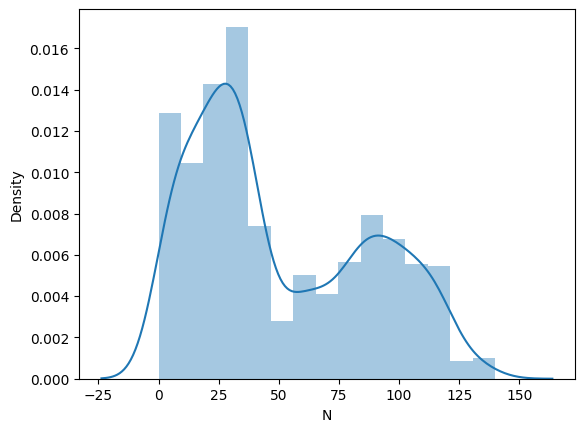

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [11]:
# Encoding
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['crop_num'] = crop['label'].map(crop_dict)

In [12]:
crop['crop_num'].value_counts()

,count
crop_num,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [13]:
crop.drop('label', axis=1, inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [14]:
# Train Test Split
x = crop.drop('crop_num', axis=1)
y = crop['crop_num']

In [15]:
x.shape

(2200, 7)

In [16]:
y.shape

(2200,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_train.shape

(1760, 7)

In [20]:
x_test.shape

(440, 7)

In [21]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [22]:
# Scale the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
ms = MinMaxScaler()

In [24]:
ms.fit(x_train)
x_train = ms.transform(x_train)
x_test = ms.transform(x_test)

In [25]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [28]:
# Training Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


models = {
    'lg': LogisticRegression(),
    'gnb': GaussianNB(),
    'svc': SVC(),
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(),
    'et': ExtraTreeClassifier(),
    'rf': RandomForestClassifier(),
    'bgc': BaggingClassifier(),
    'gbc': GradientBoostingClassifier(),
    'adaboost': AdaBoostClassifier()
}

for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)

    print(f"{name} with accuracy : {accuracy_score(y_test, ypred)}")

lg with accuracy : 0.9636363636363636
gnb with accuracy : 0.9954545454545455
svc with accuracy : 0.9681818181818181
knn with accuracy : 0.9590909090909091
dt with accuracy : 0.9886363636363636
et with accuracy : 0.9181818181818182
rf with accuracy : 0.9931818181818182
bgc with accuracy : 0.9886363636363636
gbc with accuracy : 0.9818181818181818
adaboost with accuracy : 0.1409090909090909


In [29]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)
accuracy_score(y_test, ypred)

0.9931818181818182

In [30]:
# Predictive System
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    prediction = rfc.predict(features).reshape(1,-1)

    return prediction[0]

In [31]:
N = 20
P = 30
k = 40
temperature = 40.0
humidity = 20
ph = 30
rainfall = 50

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {
    1: 'Rice', 2: 'Maize', 3: 'Jute', 4: 'Cotton', 5: 'Coconut', 6: 'Papaya', 7: 'Orange',
    8: 'Apple', 9: 'Muskmelon', 10: 'Watermelon', 11: 'Grapes', 12: 'Mango', 13: 'Banana',
    14: 'Pomegranate', 15: 'Lentil', 16: 'Blackgram', 17: 'Mungbean', 18: 'Mothbeans',
    19: 'Pigeonpeas', 20: 'kidneybeans', 21: 'Chickpea', 22: 'Coffee'
}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print(f"{crop} is a best crop to be cultivated.")
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Apple is a best crop to be cultivated.


In [32]:
import pickle
pickle.dump(rfc,open('model.pkl', 'wb'))